In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
from sklearn.decomposition import PCA
pca = PCA(0.95)
data = pca.fit_transform(digits.data)

10


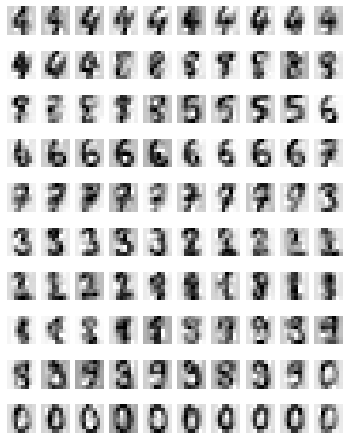

20


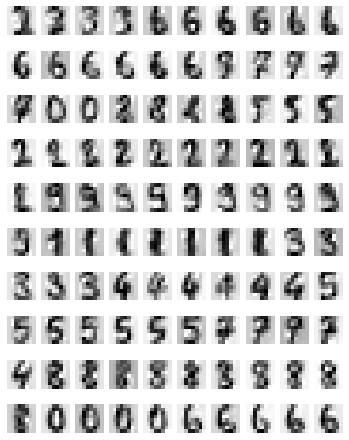

30


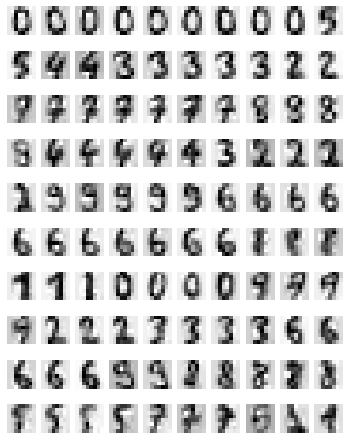

40


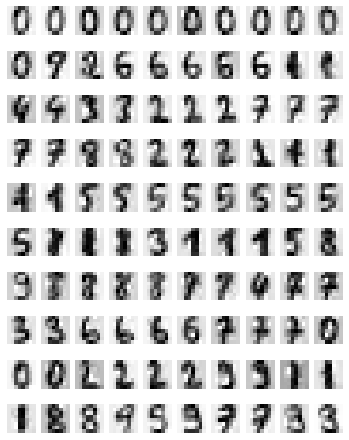

50


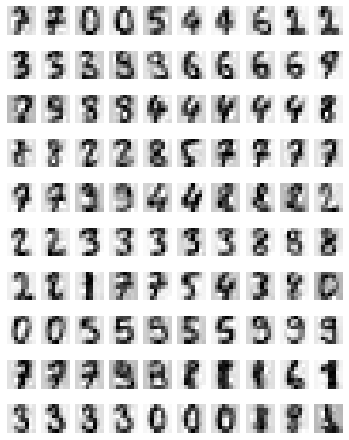

60


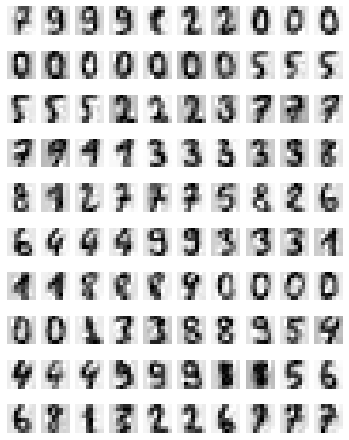

70


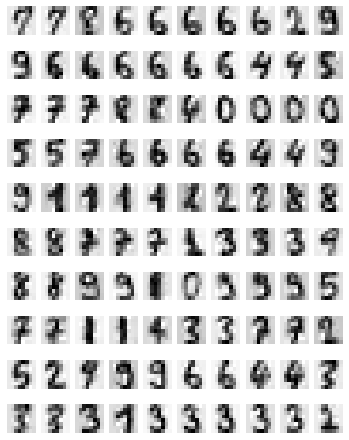

80


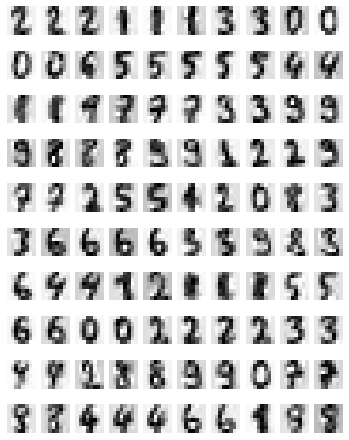

90


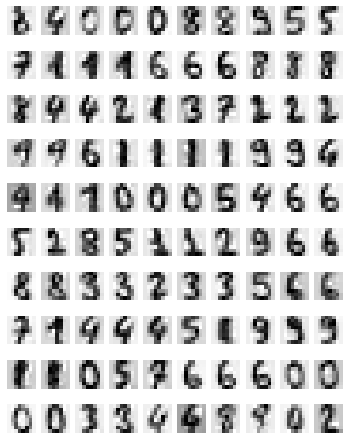

100


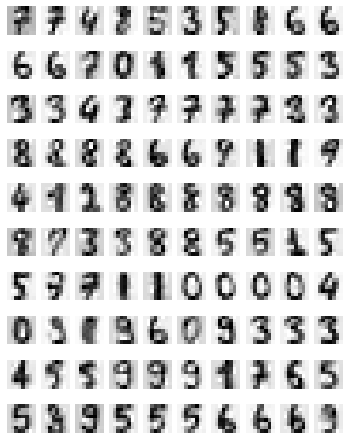

110


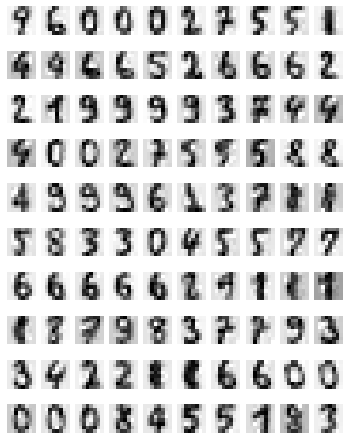

120


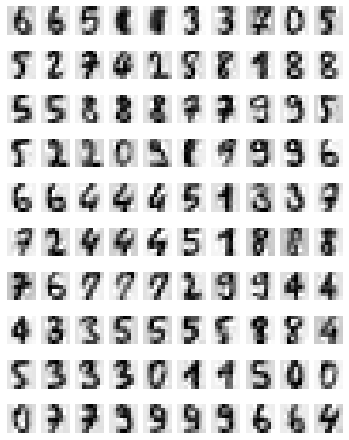

130


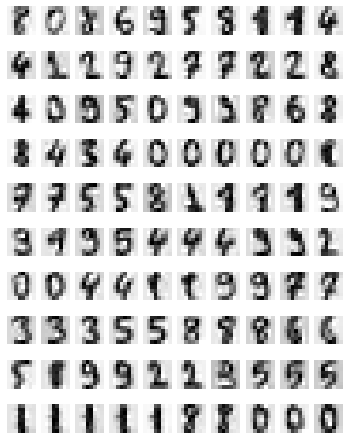

140


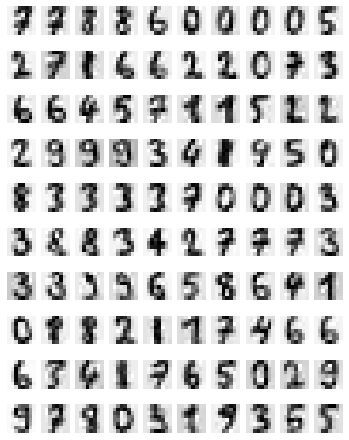

150


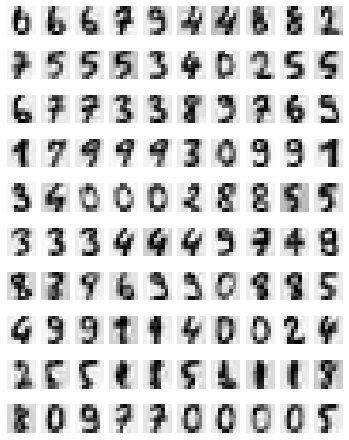

160


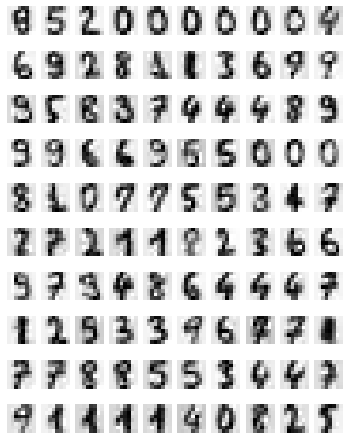

170


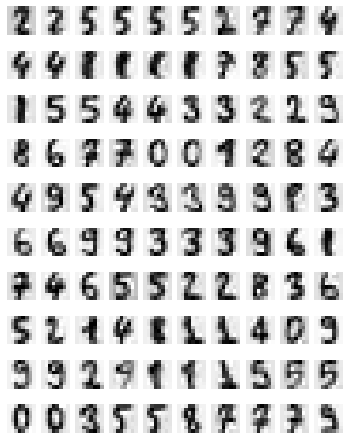

180


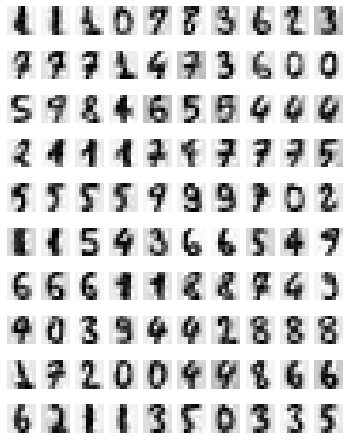

190


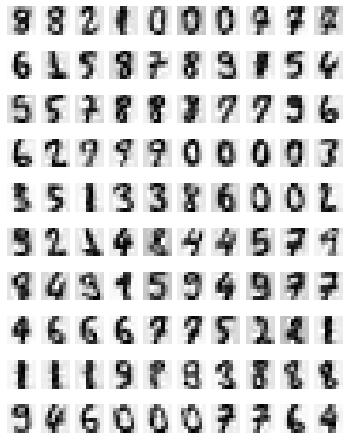

200


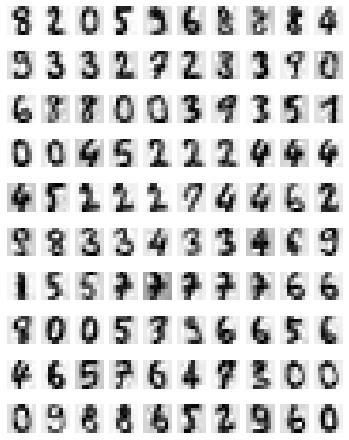

210


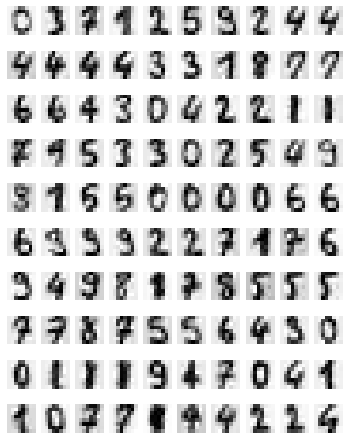

220


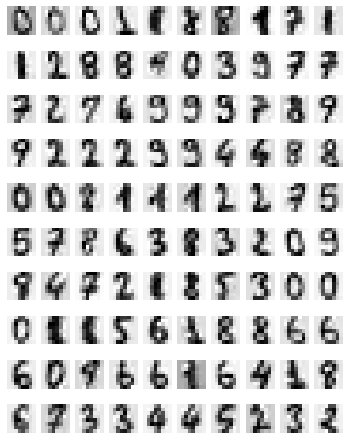

230


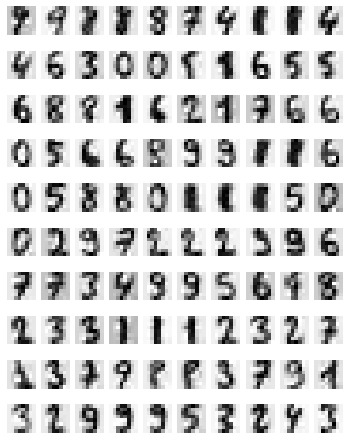

240


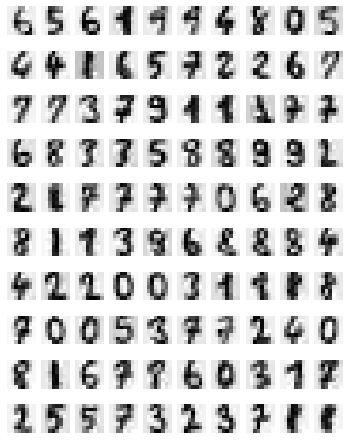

250


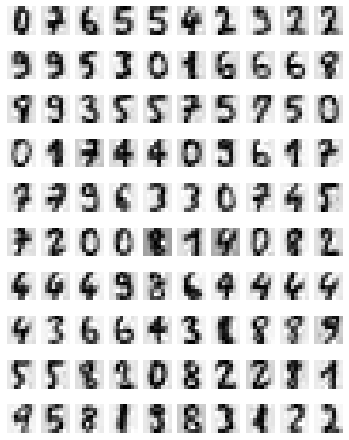

260


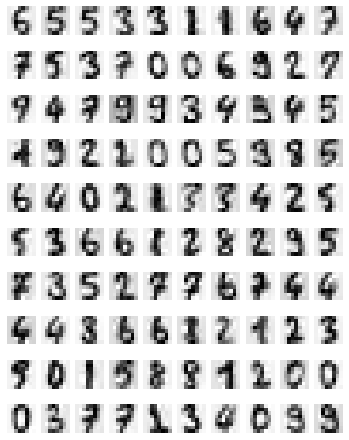

270


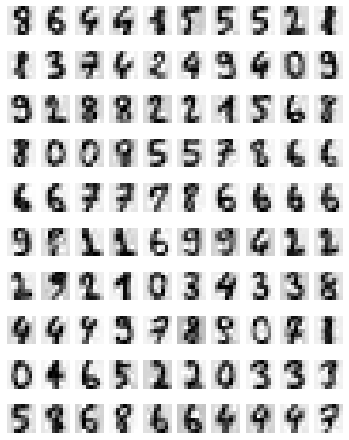

280


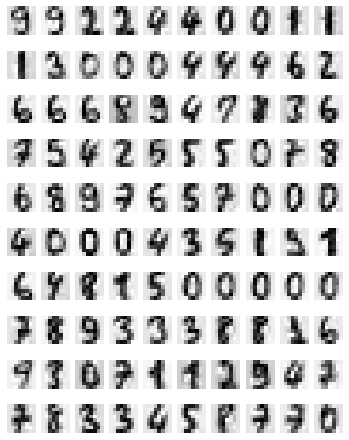

290


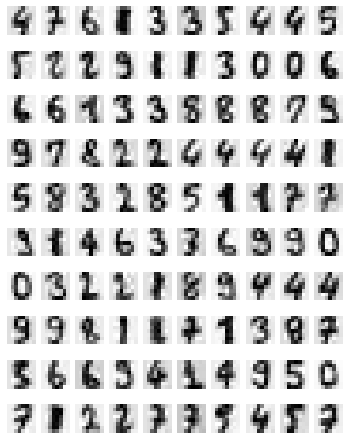

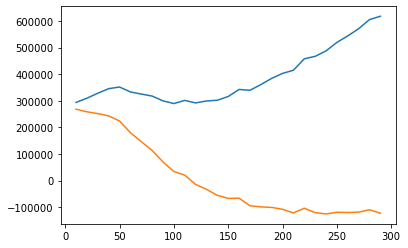

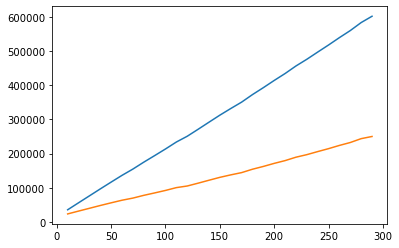

In [2]:
from sklearn.mixture import GaussianMixture
bic, aic, bic100, aic100 = [], [], [], []
rng = list(range(10, 300, 10))
for n_components in rng:
  mixt = GaussianMixture(n_components=n_components, covariance_type='full')
  mixt.fit(data)
  data100 = mixt.sample(100)[0]
  new_digits = pca.inverse_transform(data100)
  import matplotlib.pyplot as plt
  fig, axes = plt.subplots(10, 10, figsize=(6, 8))
  for idx, image in enumerate(new_digits):
    ax = axes[idx // 10, idx % 10]
    ax.imshow(image.reshape((8, 8)), cmap='binary')
    ax.set_xticks(()); ax.set_yticks(()) # remove ticks
    ax.axis('off')
  print(n_components)
  plt.show()
  bic100 += [mixt.bic(data100)]
  aic100 += [mixt.aic(data100)]
  bic += [mixt.bic(data)]
  aic += [mixt.aic(data)]
plt.plot(rng, bic)
plt.plot(rng, aic)
plt.show()
plt.plot(rng, bic100)
plt.plot(rng, aic100)
plt.show()